UYGA VAZIFA

In [57]:
#Install the Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb

In [66]:
#Upload Data
df = pd.read_csv("cards_data.csv")

In [67]:
#Explore Data
df.head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524.0,825.0,Visa,Debit,4.344680e+15,Dec-22,623.0,YES,2,$24295,Sep-02,2008,No
1,2731.0,825.0,Visa,Debit,4.956970e+15,Dec-20,393.0,YES,2,$21968,Apr-14,2014,No
2,3701.0,825.0,Visa,NaN,4.582310e+15,Feb-24,719.0,YES,2,$46414,Jul-03,2004,No
3,42.0,825.0,Visa,Credit,4.879490e+15,Aug-24,693.0,NO,1,$12400,Jan-03,2012,No
4,4659.0,825.0,Mastercard,Debit (Prepaid),5.722870e+15,Mar-09,75.0,YES,1,$28,Sep-08,2009,No


In [68]:
df.tail()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
6141,5361.0,185.0,Amex,Credit,3.006100e+14,Jan-24,663.0,YES,1,$6900,Nov-00,2013,No
6142,2711.0,185.0,Visa,Credit,4.718520e+15,Jan-21,492.0,YES,2,$5700,Apr-12,2012,No
6143,1305.0,1007.0,Mastercard,Credit,5.929510e+15,Aug-20,237.0,NO,2,$9200,Feb-12,2012,No
6144,743.0,1110.0,Mastercard,Debit,5.589770e+15,Jan-20,630.0,YES,1,NaN,Jan-20,2020,No
6145,3199.0,1110.0,Visa,Credit,4.994010e+15,Dec-20,120.0,YES,1,$14400,May-17,2017,No


In [69]:
#General Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     6145 non-null   float64
 1   client_id              6145 non-null   float64
 2   card_brand             6145 non-null   object 
 3   card_type              6144 non-null   object 
 4   card_number            6145 non-null   float64
 5   expires                6146 non-null   object 
 6   cvv                    6145 non-null   float64
 7   has_chip               6145 non-null   object 
 8   num_cards_issued       6146 non-null   int64  
 9   credit_limit           6144 non-null   object 
 10  acct_open_date         6145 non-null   object 
 11  year_pin_last_changed  6146 non-null   int64  
 12  card_on_dark_web       6145 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 624.3+ KB


In [70]:
#Check for Null Value
df.isnull().sum()

id                       1
client_id                1
card_brand               1
card_type                2
card_number              1
expires                  0
cvv                      1
has_chip                 1
num_cards_issued         0
credit_limit             2
acct_open_date           1
year_pin_last_changed    0
card_on_dark_web         1
dtype: int64

In [71]:
#Show Columns with Missing Values
missing_columns = df.isnull().sum()
missing_columns = missing_columns[missing_columns>0]
if not missing_columns.empty:
    print("The following columns contain missing values:")
    print(missing_columns)
else:
    print("The following columns not missing values:")

The following columns contain missing values:
id                  1
client_id           1
card_brand          1
card_type           2
card_number         1
cvv                 1
has_chip            1
credit_limit        2
acct_open_date      1
card_on_dark_web    1
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

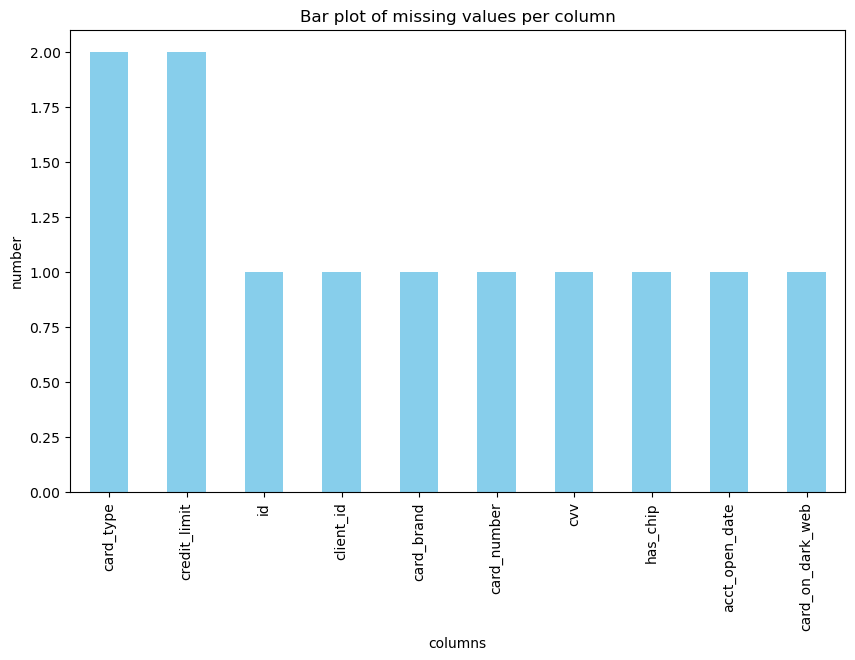

In [72]:
# Bar plot of missing values per column
missing_counts = df.isnull().sum()
missing_counts[missing_counts>0].sort_values(ascending=False).plot(kind='bar',figsize=(10,6),color='skyblue')
plt.title('Bar plot of missing values per column')
plt.ylabel('number')
plt.xlabel('columns')
plt.show


In [73]:
#Fill Missing Values
#mean

df['cvv'] = df['cvv'].fillna(df['cvv'].mean())


In [74]:
df.isnull().sum()

id                       1
client_id                1
card_brand               1
card_type                2
card_number              1
expires                  0
cvv                      0
has_chip                 1
num_cards_issued         0
credit_limit             2
acct_open_date           1
year_pin_last_changed    0
card_on_dark_web         1
dtype: int64

In [78]:
df['card_type'] = df['card_type'].fillna(df['card_type'].mode()[0])


In [80]:
df.isnull().sum()

id                       1
client_id                1
card_brand               1
card_type                0
card_number              1
expires                  0
cvv                      0
has_chip                 1
num_cards_issued         0
credit_limit             2
acct_open_date           1
year_pin_last_changed    0
card_on_dark_web         1
dtype: int64

In [82]:
for column in df.columns:
    if df[column].isnull().sum() > 0:
        if df[column].dtype == 'object':
            df[column] = df[column].fillna(df[column].mode()[0])
        else:
            df[column] = df[column].fillna(df[column].mean())


In [83]:
df.isnull().sum()

id                       0
client_id                0
card_brand               0
card_type                0
card_number              0
expires                  0
cvv                      0
has_chip                 0
num_cards_issued         0
credit_limit             0
acct_open_date           0
year_pin_last_changed    0
card_on_dark_web         0
dtype: int64

In [84]:
#Label Encoding

categorical_data=df.select_dtypes(include=['object', 'category']).columns

In [85]:
categorical_data

Index(['card_brand', 'card_type', 'expires', 'has_chip', 'credit_limit',
       'acct_open_date', 'card_on_dark_web'],
      dtype='object')

In [86]:
#Label encoding

from sklearn.preprocessing  import LabelEncoder
label_encoder=LabelEncoder

In [87]:
#Label Encoding

categorical_columns=df.select_dtypes(include=['object', 'category']).columns

In [88]:
categorical_columns

Index(['card_brand', 'card_type', 'expires', 'has_chip', 'credit_limit',
       'acct_open_date', 'card_on_dark_web'],
      dtype='object')

In [89]:
#Label encoding

from sklearn.preprocessing  import LabelEncoder
label_encoder=LabelEncoder

In [92]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_col:
    df[col] = label_encoder.fit_transform(df[col])
    print(df.head())

       id  client_id  card_brand  card_type   card_number  expires    cvv  \
0  4524.0      825.0           3          1  4.344680e+15       59  623.0   
1  2731.0      825.0           3          1  4.956970e+15       57  393.0   
2  3701.0      825.0           3          1  4.582310e+15       83  719.0   
3    42.0      825.0           3          0  4.879490e+15       39  693.0   
4  4659.0      825.0           2          2  5.722870e+15      154   75.0   

   has_chip  num_cards_issued  credit_limit  acct_open_date  \
0         1                 2          2099             278   
1         1                 2          1856              14   
2         1                 2          3025             134   
3         0                 1           383             107   
4         1                 1          2412             284   

   year_pin_last_changed  card_on_dark_web  
0                   2008                 0  
1                   2014                 0  
2                   200